In [17]:
import pandas as pd
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Glassdoor_Job_Postings.csv')
df

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,"₹3,25,236",/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,NaN,NaN,10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,NaN,NaN,10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,Facctum Solutions,Data Analyst,NaN,Job Description\nExperience: 0 - 2 years in da...,Karnataka,NaN,NaN,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,NaN,NaN,10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Kpro Solutions,Analytics & Data Science,4.0,Experience & Qualification:\n\nMinimum of 9 ye...,Bengaluru,"₹4,83,915",/yr (est.),1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,4.0,4.0,4.0,4.0,4.0
896,Athena Global Technologies,Data Engineer,NaN,Immediate requirement for Data Engineer\nExper...,Hyderābād,"₹6,78,949",/yr (est.),51 to 200 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,4.2,3.5,4.0,3.9,3.9
897,Wesco,India-Bangalore: Data Engineer,3.7,This person will work independently or with a ...,Bengaluru,"₹6,51,920",/yr (est.),10000+ Employees,1922,Company - Public,Wholesale,Retail & Wholesale,$10+ billion (USD),3.5,3.4,3.6,3.3,3.8
898,Course5,Data Scientist,4.2,If you meet our position requirements and can ...,Bengaluru,"₹4,24,426",/yr (est.),1001 to 5000 Employees,2000,Company - Private,Business Consulting,Management & Consulting,$100 to $500 million (USD),4.3,4.1,4.3,4.1,4.2


In [19]:
selected_columns = ['company', 'sector', 'location', 'job_description']
df_selected = df[selected_columns]
df_selected['job_description'] = df_selected['job_description'].astype(str)

C:\Users\grego\AppData\Local\Temp\ipykernel_17916\763682019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['job_description'] = df_selected['job_description'].astype(str)


In [20]:
# preprocessing des mots lemma et stopword
nlp = spacy.load('en_core_web_sm')
def tokenize_Stopwords(text):
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    text = nlp(text)
    text = [word.lemma_.lower() for word in text if not word.is_stop]
    return text

In [21]:
df_selected['Token_filtered'] = df_selected['job_description'].apply(tokenize_Stopwords)

C:\Users\grego\AppData\Local\Temp\ipykernel_17916\3454363993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Token_filtered'] = df_selected['job_description'].apply(tokenize_Stopwords)


In [22]:
# Tout les mots filtré par description de job
alltoken = df_selected['Token_filtered'].explode()
alltoken

0           junior
0             data
0      analysttake
0           career
0             step
          ...     
899        machine
899       learning
899       position
899       industry
899       academia
Name: Token_filtered, Length: 196109, dtype: object

In [23]:
# le nomnbre de token unique
nlp.max_length = 3000000 # pour éviter le problème de max_length
corpus = ' '.join(df_selected['job_description'])
doc = nlp(corpus)
uniqueToken = set(token.text for token in doc)
print("Nombre de token unique dans le job description : ",len(uniqueToken))

Nombre de token unique dans le job description :  15835


In [24]:
# Compte le nombre de token unique seulement une fois
from collections import Counter
tokenFreq = Counter(token.text for token in doc)
singletons = [token for token in tokenFreq if tokenFreq[token] == 1]
print("Nombre de token unique qui n'apparaissent qu'une seule fois : ",len(singletons))

Nombre de token unique qui n'apparaissent qu'une seule fois :  6397


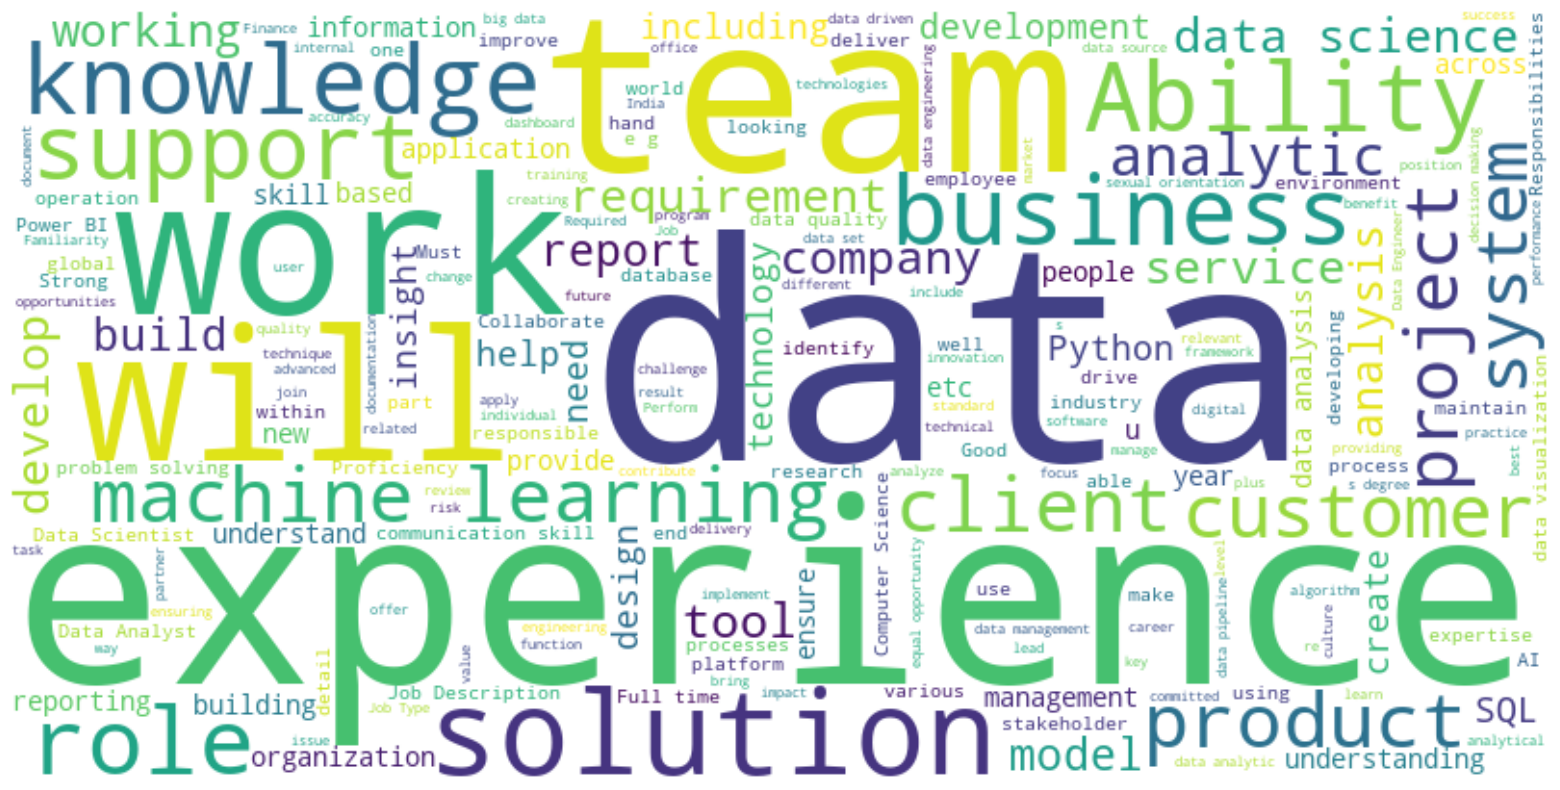

In [25]:
from wordcloud import WordCloud
corpus = ' '.join(df_selected['job_description'])
doc = nlp(corpus)

tokenfreq = Counter(token.text for token in doc)
singleLineText = " ".join([token.replace("\n", ' ') for token in df_selected['job_description']])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(singleLineText)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()